In [2]:
# Python Modules and instantiation
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import time
import os
# %matplotlib widget
# ROSCO toolbox modules 
from ROSCO_toolbox import utilities as rosco_utilities
# WISDEM modules
from wisdem.aeroelasticse.Util import FileTools
# Batch Analysis tools
from pCrunch import Processing, Analysis
from pCrunch import pdTools

# Instantiate fast_IO
fast_io = rosco_utilities.FAST_IO()
fast_pl = rosco_utilities.FAST_Plots()

import importlib
Processing = importlib.reload(Processing)
Analysis = importlib.reload(Analysis)


# point to some file paths
outfile_base = ['/Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/',
                '/Users/pbortolo/work/3_projects/3_BAR/loads/BAR01/loads_BAR01_200812/',
                '/Users/pbortolo/work/3_projects/3_BAR/loads/BAR02/loads_BAR02_200812/',
                '/Users/pbortolo/work/3_projects/3_BAR/loads/BAR03/loads_BAR03_200812/']
fname_case_matrix = [os.path.join(outfile_base[0],'case_matrix.yaml'),
                     os.path.join(outfile_base[1],'case_matrix.yaml'),
                     os.path.join(outfile_base[2],'case_matrix.yaml'),
                     os.path.join(outfile_base[3],'case_matrix.yaml')]
case_names   = ['BAR00','BAR01','BAR02','BAR03']

output_folder= '/Users/pbortolo/Dropbox/Writing/BARdesigns/'
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)



In [3]:
# Load case matrix into dataframe
cm = [''] * len(outfile_base)
for i in range(len(outfile_base)):
    case_matrix = FileTools.load_yaml(fname_case_matrix[i], package=1)
    cm[i] = pd.DataFrame(case_matrix)   

# Pare down case matrix for desired runs and load the outfiles
outfiles       = [''] * len(outfile_base)
outfiles_DLC11 = [''] * len(outfile_base)
windspeeds = {}
import copy
cm_DLC11 = copy.copy(cm)
for i in range(len(outfile_base)):
    outnames   = []
    outnames_DLC11   = []
    drop_lines = []
    for j in range(len(cm[i])):
        outnames.append(outfile_base[i] + cm[i]['Case_Name'][j] + '.outb')
        if cm[i][('IEC', 'DLC')][j] == 1.1:
            outnames_DLC11.append(outfile_base[i] + cm[i]['Case_Name'][j] + '.outb')
        else:
            drop_lines.append(j)
    outfiles[i]       = outnames
    outfiles_DLC11[i] = outnames_DLC11
    drop_lines
    if drop_lines != []: 
        cm_DLC11[i] = cm_DLC11[i].drop(cm_DLC11[i].index[np.array(drop_lines)])
    windspeeds[case_names[i]], seed, IECtype, cmw = Processing.get_windspeeds(cm_DLC11[i], return_df=True)


In [4]:
fp = Processing.FAST_Processing()
fp.OpenFAST_outfile_list = outfiles
fp.dataset_names = ['DLC1.1']
fp.to = 120
fp.parallel_analysis = True
fp.save_LoadRanking = False
fp.save_SummaryStats = False
fp.verbose=True

stats_DLC11 = {}
load_ranking_DLC11 = {}
for i in range(len(outfile_base)):
    stats_DLC11[case_names[i]], load_ranking_DLC11[case_names[i]] = fp.design_comparison(outfiles_DLC11[i])

Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/BAR00_003.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/BAR00_006.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/BAR00_000.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/BAR00_009.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/BAR00_015.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/BAR00_012.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/BAR00_018.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/BAR00_021.outb
Processing data for BAR00_003
Processing data for BAR00_000
Processing data for BAR00_009
Processing data for BAR00_012
Processing data for BAR00_006
Processing data for BAR00_021
Proc

Processing data for BAR00_049
Processing data for BAR00_052
Processing data for BAR00_055
Processing data for BAR00_058
Processing data for BAR00_061
Processing data for BAR00_067
Processing data for BAR00_064
Processing data for BAR00_070
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/BAR00_053.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/BAR00_050.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/BAR00_056.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/BAR00_059.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/BAR00_071.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/BAR00_062.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR00/loads_BAR00_200804/BAR00_068.outb
Loading data from /Users/pbortolo/work/3_proje

Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR01/loads_BAR01_200812/BAR01_053.outb
Processing data for BAR01_049
Processing data for BAR01_051
Processing data for BAR01_053
Calculating load rankings.
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR02/loads_BAR02_200812/BAR02_002.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR02/loads_BAR02_200812/BAR02_010.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR02/loads_BAR02_200812/BAR02_006.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR02/loads_BAR02_200812/BAR02_004.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR02/loads_BAR02_200812/BAR02_014.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR02/loads_BAR02_200812/BAR02_008.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR02/loads_BAR02_200812/BAR02_000.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR02

Processing data for BAR03_009
Processing data for BAR03_006
Processing data for BAR03_021
Processing data for BAR03_012
Processing data for BAR03_003
Processing data for BAR03_018
Processing data for BAR03_000
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR03/loads_BAR03_200812/BAR03_022.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR03/loads_BAR03_200812/BAR03_004.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR03/loads_BAR03_200812/BAR03_016.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR03/loads_BAR03_200812/BAR03_001.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR03/loads_BAR03_200812/BAR03_013.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR03/loads_BAR03_200812/BAR03_010.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR03/loads_BAR03_200812/BAR03_007.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR03/loads_BA

Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR03/loads_BAR03_200812/BAR03_068.outb
Loading data from /Users/pbortolo/work/3_projects/3_BAR/loads/BAR03/loads_BAR03_200812/BAR03_071.outb
Processing data for BAR03_050
Processing data for BAR03_056
Processing data for BAR03_059
Processing data for BAR03_062
Processing data for BAR03_065
Processing data for BAR03_053
Processing data for BAR03_068
Processing data for BAR03_071
Calculating load rankings.


In [5]:
# Define mean and std dataframes
RDz40pc     = {}
RDz_std40pc = {}
RDz60pc     = {}
RDz_std60pc = {}
RDz80pc     = {}
RDz_std80pc = {}
RDz100pc    = {}
RDz_std100pc= {}
for i in range(len(outfile_base)):
    stats_df = pdTools.dict2df(stats_DLC11[case_names[i]])
    RDz40pc[case_names[i]] = np.mean([stats_df[('dataset_0', 'B1N4RDzr', 'mean')],
             stats_df[('dataset_0', 'B2N4RDzr', 'mean')],
             stats_df[('dataset_0', 'B3N4RDzr', 'mean')]], axis=0)
    RDz_std40pc[case_names[i]] = np.mean([stats_df[('dataset_0', 'B1N4RDzr', 'std')],
             stats_df[('dataset_0', 'B2N4RDzr', 'std')],
             stats_df[('dataset_0', 'B3N4RDzr', 'std')]], axis=0)
    RDz60pc[case_names[i]] = np.mean([stats_df[('dataset_0', 'B1N6RDzr', 'mean')],
             stats_df[('dataset_0', 'B2N6RDzr', 'mean')],
             stats_df[('dataset_0', 'B3N6RDzr', 'mean')]], axis=0)
    RDz_std60pc[case_names[i]] = np.mean([stats_df[('dataset_0', 'B1N6RDzr', 'std')],
             stats_df[('dataset_0', 'B2N6RDzr', 'std')],
             stats_df[('dataset_0', 'B3N6RDzr', 'std')]], axis=0)
    RDz80pc[case_names[i]] = np.mean([stats_df[('dataset_0', 'B1N8RDzr', 'mean')],
             stats_df[('dataset_0', 'B2N8RDzr', 'mean')],
             stats_df[('dataset_0', 'B3N8RDzr', 'mean')]], axis=0)
    RDz_std80pc[case_names[i]] = np.mean([stats_df[('dataset_0', 'B1N8RDzr', 'std')],
             stats_df[('dataset_0', 'B2N8RDzr', 'std')],
             stats_df[('dataset_0', 'B3N8RDzr', 'std')]], axis=0)
    RDz100pc[case_names[i]] = np.mean([stats_df[('dataset_0', 'B1TipRDzr', 'mean')],
             stats_df[('dataset_0', 'B2TipRDzr', 'mean')],
             stats_df[('dataset_0', 'B3TipRDzr', 'mean')]], axis=0)
    RDz_std100pc[case_names[i]] = np.mean([stats_df[('dataset_0', 'B1TipRDzr', 'std')],
             stats_df[('dataset_0', 'B2TipRDzr', 'std')],
             stats_df[('dataset_0', 'B3TipRDzr', 'std')]], axis=0)
mean_RDz40pc = np.zeros([len(outfile_base), 12])
std_RDz40pc  = np.zeros([len(outfile_base), 12])
mean_RDz60pc = np.zeros([len(outfile_base), 12])
std_RDz60pc  = np.zeros([len(outfile_base), 12])
mean_RDz80pc = np.zeros([len(outfile_base), 12])
std_RDz80pc  = np.zeros([len(outfile_base), 12])
mean_RDz100pc = np.zeros([len(outfile_base), 12])
std_RDz100pc  = np.zeros([len(outfile_base), 12])

for i in range(len(outfile_base)):
    for j in range(len(np.unique(windspeeds[case_names[i]]))):
        mean_RDz40pc[i,j] = RDz40pc[case_names[i]][j*6 : j*6+6].mean()
        std_RDz40pc[i,j]  = RDz_std40pc[case_names[i]][j*6 : j*6+6].mean()
        mean_RDz60pc[i,j] = RDz60pc[case_names[i]][j*6 : j*6+6].mean()
        std_RDz60pc[i,j]  = RDz_std60pc[case_names[i]][j*6 : j*6+6].mean()
        mean_RDz80pc[i,j] = RDz80pc[case_names[i]][j*6 : j*6+6].mean()
        std_RDz80pc[i,j]  = RDz_std80pc[case_names[i]][j*6 : j*6+6].mean()
        mean_RDz100pc[i,j] = RDz100pc[case_names[i]][j*6 : j*6+6].mean()
        std_RDz100pc[i,j]  = RDz_std100pc[case_names[i]][j*6 : j*6+6].mean()

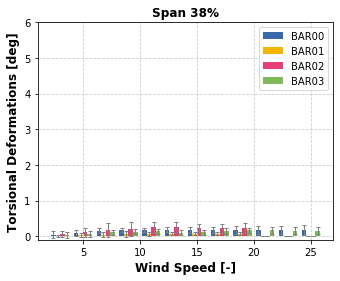

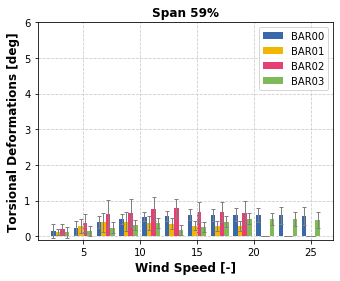

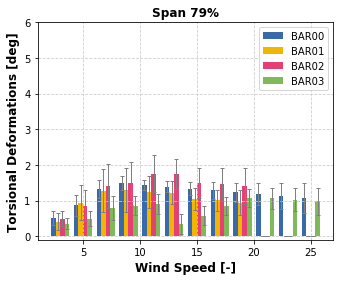

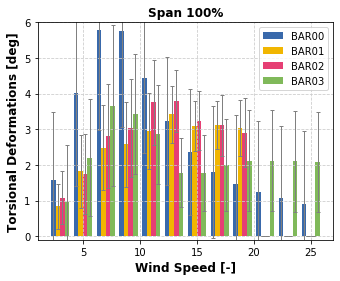

In [9]:
from palettable.cartocolors.qualitative import Bold_7
Clr = Bold_7
fs = 10
width = np.array([-0.6, -0.2, 0.2,  0.6])
extension = '.pdf'
fig, ax = plt.subplots(1,1,figsize=(5.3, 4))
for i in range(len(outfile_base)):
    plt.bar(np.unique(windspeeds[case_names[0]])+width[i],-mean_RDz40pc[i,:]*180. / np.pi, 
        yerr = std_RDz40pc[i,:]*180. / np.pi, width = 0.4, label = case_names[i],
        error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=1),
        color = np.array(Clr.colors[i+2])/256.)
plt.xlabel('Wind Speed [-]', fontsize=10+2, fontweight='bold')
plt.ylabel('Torsional Deformations [deg]', fontsize=10+2, fontweight='bold')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax.legend(fontsize=fs)
ax.set_ylim(bottom=-0.1, top=6.)
plt.title('Span 38%', fontsize=10+2, fontweight='bold')
plt.grid(color=[0.8,0.8,0.8], linestyle='--')
#plt.subplots_adjust(bottom = 0.5, left = 0.2)
plt.show()
fig.savefig(output_folder + 'N4RDzr' + extension)

fig, ax = plt.subplots(1,1,figsize=(5.3, 4))
for i in range(len(outfile_base)):
    plt.bar(np.unique(windspeeds[case_names[0]])+width[i],-mean_RDz60pc[i,:]*180. / np.pi, 
        yerr = std_RDz60pc[i,:]*180. / np.pi, width = 0.4, label = case_names[i],
        error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=1),
        color = np.array(Clr.colors[i+2])/256.)
plt.xlabel('Wind Speed [-]', fontsize=10+2, fontweight='bold')
plt.ylabel('Torsional Deformations [deg]', fontsize=10+2, fontweight='bold')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax.legend(fontsize=fs)
ax.set_ylim(bottom=-0.1, top=6.)
plt.title('Span 59%', fontsize=10+2, fontweight='bold')
plt.grid(color=[0.8,0.8,0.8], linestyle='--')
#plt.subplots_adjust(bottom = 0.5, left = 0.2)
plt.show()
fig.savefig(output_folder + 'N6RDzr' + extension)

fig, ax = plt.subplots(1,1,figsize=(5.3, 4))
for i in range(len(outfile_base)):
    plt.bar(np.unique(windspeeds[case_names[0]])+width[i],-mean_RDz80pc[i,:]*180. / np.pi, 
        yerr = std_RDz80pc[i,:]*180. / np.pi, width = 0.4, label = case_names[i],
        error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=1),
        color = np.array(Clr.colors[i+2])/256.)
plt.xlabel('Wind Speed [-]', fontsize=10+2, fontweight='bold')
plt.ylabel('Torsional Deformations [deg]', fontsize=10+2, fontweight='bold')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax.legend(fontsize=fs)
ax.set_ylim(bottom=-0.1, top=6.)
plt.title('Span 79%', fontsize=10+2, fontweight='bold')
plt.grid(color=[0.8,0.8,0.8], linestyle='--')
#plt.subplots_adjust(bottom = 0.5, left = 0.2)
plt.show()
fig.savefig(output_folder + 'N8RDzr' + extension)

fig, ax = plt.subplots(1,1,figsize=(5.3, 4))
for i in range(len(outfile_base)):
    plt.bar(np.unique(windspeeds[case_names[0]])+width[i],-mean_RDz100pc[i,:]*180. / np.pi, 
        yerr = std_RDz100pc[i,:]*180. / np.pi, width = 0.4, label = case_names[i],
        error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=1),
        color = np.array(Clr.colors[i+2])/256.)
plt.xlabel('Wind Speed [-]', fontsize=10+2, fontweight='bold')
plt.ylabel('Torsional Deformations [deg]', fontsize=10+2, fontweight='bold')
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
ax.legend(fontsize=fs)
ax.set_ylim(bottom=-0.1, top=6.)
plt.title('Span 100%', fontsize=10+2, fontweight='bold')
plt.grid(color=[0.8,0.8,0.8], linestyle='--')
#plt.subplots_adjust(bottom = 0.5, left = 0.2)
plt.show()
fig.savefig(output_folder + 'TipRDzr' + extension)